# Initial phase

## Import libraries

In [220]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## Load dataframe

In [166]:
dir = 'c:/Kotomin/StatWorks/6_Маркетинг/2023_06_analysis/'
file = "ProductData.csv"

In [167]:
df = pd.read_csv(dir + file, dtype=str, sep=';')

# Product clusterisation

## Product prise distribution

### Fix uncorrect product code

In [168]:
ved = df['ved_g33'].unique()
ved

array(['2905392500', '2930909508', '1520000000', '3817008000',
       '2710193500', '2503001000', '2901290000', '2909498009',
       '2933790000', '3823700000', '7403190000', '2909430009',
       '2825100000', '2924190009', '2710193100', '2914290000',
       '2707509000', '2905320000', '2707999900', '2847000000',
       '2907130000', '2930909509', '2907199000', '2712903900',
       '2710129001', '2902900000', '2905450009', '2933399900',
       '2903230000', '3204130000', '2907290000', '3824999609',
       '3902909000', '3914000000', '2917139000', '2922290000',
       '2823000000', '2921511900', '2922197000', '2710199800',
       '3812209000', '2907151000', '2907220000', '2903998000',
       '2917110000', '2921210000', '2827320001', '3206497000',
       '2921110000', '2836400000', '2831100000', '3811290000',
       '2916310000', '3402130000', '3906909007', '2915705000',
       '2921430000', '2836910000', '2931900001', '2931900009',
       '2834298000', '2921599000', '3901908000', '28275

In [169]:
ind = df[df['ved_g33'] == '2901290000\xa0'].index
df.loc[ind,'ved_g33'] = '2901290000'

In [170]:
ved = df['ved_g33'].unique()
ved

array(['2905392500', '2930909508', '1520000000', '3817008000',
       '2710193500', '2503001000', '2901290000', '2909498009',
       '2933790000', '3823700000', '7403190000', '2909430009',
       '2825100000', '2924190009', '2710193100', '2914290000',
       '2707509000', '2905320000', '2707999900', '2847000000',
       '2907130000', '2930909509', '2907199000', '2712903900',
       '2710129001', '2902900000', '2905450009', '2933399900',
       '2903230000', '3204130000', '2907290000', '3824999609',
       '3902909000', '3914000000', '2917139000', '2922290000',
       '2823000000', '2921511900', '2922197000', '2710199800',
       '3812209000', '2907151000', '2907220000', '2903998000',
       '2917110000', '2921210000', '2827320001', '3206497000',
       '2921110000', '2836400000', '2831100000', '3811290000',
       '2916310000', '3402130000', '3906909007', '2915705000',
       '2921430000', '2836910000', '2931900001', '2931900009',
       '2834298000', '2921599000', '3901908000', '28275

### Cost value reformat 

In [171]:
df = df.astype({'currency_cost_g42': float, 'netto_g38': float, 'price_usdkg': float})

### Trash data (zero and nan both in source and calculated prices)

In [172]:
df['price_currency'] = df['currency_cost_g42'] / df['netto_g38']
zero_zero = df[(df['price_currency'] == 0) & (df['price_usdkg'] == 0)].loc[:, ['currency_code_g221','price_currency', 'price_usdkg']]
nan_zero = df[(df['price_currency'].isna()) & (df['price_usdkg'] == 0)].loc[:, ['currency_code_g221','price_currency', 'price_usdkg']]
zero_nan = df[(df['price_currency'] == 0) & (df['price_usdkg'].isna())].loc[:, ['currency_code_g221','price_currency', 'price_usdkg']]
nan_nan = df[(df['price_currency'].isna()) & (df['price_usdkg'].isna())].loc[:, ['currency_code_g221','price_currency', 'price_usdkg']]
pd.concat([zero_zero, nan_zero, zero_nan, nan_nan])

,currency_code_g221,price_currency,price_usdkg
5481,USD,0.0,0.0
9008,EUR,0.0,0.0
2687,CHF,NaN,NaN
4061,USD,NaN,NaN
4092,USD,NaN,NaN
4629,RUB,NaN,NaN
6434,EUR,NaN,NaN
6466,USD,NaN,NaN
6603,GBP,NaN,NaN
6898,USD,NaN,NaN


### Replace the source price by calculated

In [173]:
usd_nan = df[(df['price_usdkg'].isna()) & (df['currency_code_g221'] == 'USD')].loc[:, ['currency_code_g221', 'price_currency', 'price_usdkg']]
usd_zero = df[(df['price_usdkg'] == 0) & (df['currency_code_g221'] == 'USD')].loc[:, ['currency_code_g221', 'price_currency', 'price_usdkg']]
pd.concat([usd_nan, usd_zero])

,currency_code_g221,price_currency,price_usdkg
666,USD,inf,NaN
2701,USD,inf,NaN
3075,USD,inf,NaN
4061,USD,NaN,NaN
4092,USD,NaN,NaN
...,...,...,...
33494,USD,0.76325,0.0
33495,USD,0.77183,0.0
33503,USD,0.79792,0.0
33510,USD,0.79592,0.0


In [177]:
for i in df.index.tolist():
    if (df.loc[i, 'price_usdkg'] == 0 or np.isnan(df.loc[i, 'price_usdkg'])) \
    and df.loc[i, 'currency_code_g221'] == 'USD' \
    and not np.isinf(df.loc[i, 'price_currency']):
        df.loc[i, 'price_usdkg'] = round(df.loc[i, 'price_currency'], 2)

### Filter NaN, zero and INF prices

In [253]:
df = df[(~df['price_usdkg'].isna()) & (df['price_usdkg'] < np.inf) & (df['price_usdkg'] != 0)]

### Simple descriptive statistics

In [254]:
for code in ved:
    price = df[df['ved_g33'] == code]['price_usdkg'].tolist()
    price = [float(p) for p in price if (not np.isnan(p) and p != 0 and not np.isinf(p))]
    print(code,
          f'n={len(price)}',
          f'min={round(min(price), 2)}', 
          f'mean={round(np.mean(price), 2)}', 
          f'median={round(np.percentile(price, 50), 2)}', 
          f'max={round(max(price), 2)}')

2905392500 n=57 min=1.4 mean=3.6 median=1.78 max=24.04
2930909508 n=1436 min=0.97 mean=2590.8 median=49.63 max=337730.0
1520000000 n=1148 min=0.14 mean=33.68 median=0.53 max=5860.8
3817008000 n=28 min=0.55 mean=1.21 median=0.86 max=8.93
2710193500 n=79 min=0.28 mean=38.63 median=0.87 max=2795.39
2503001000 n=314 min=0.02 mean=0.09 median=0.07 max=0.2
2901290000 n=2959 min=0.22 mean=362.63 median=1.72 max=111459.9
2909498009 n=1483 min=0.57 mean=758.87 median=4.17 max=110656.5
2933790000 n=146 min=1.57 mean=19828.93 median=76.03 max=271907.0
3823700000 n=692 min=1.31 mean=3.66 median=2.09 max=266.67
7403190000 n=253 min=2.25 mean=78.91 median=7.74 max=3189.27
2909430009 n=382 min=0.79 mean=8.31 median=3.14 max=331.84
2825100000 n=252 min=1.34 mean=234.4 median=59.66 max=15009.17
2924190009 n=2372 min=0.27 mean=2931.1 median=41.9 max=519500.0
2710193100 n=114 min=0.31 mean=1.17 median=1.44 max=2.06
2914290000 n=37 min=2.17 mean=895.06 median=242.27 max=7166.0
2707509000 n=371 min=0.18 me

### ВЭД 2905392500

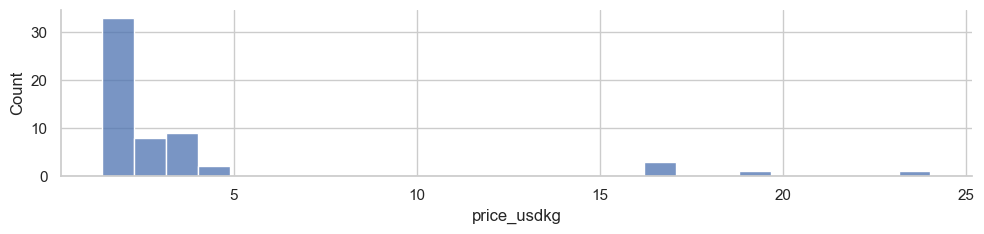

In [255]:
for code in ved[0:1]:
    sns.displot(df[(df['ved_g33'] == code)], x="price_usdkg", height=2.5, aspect=4)

### ВЭД 2930909508 

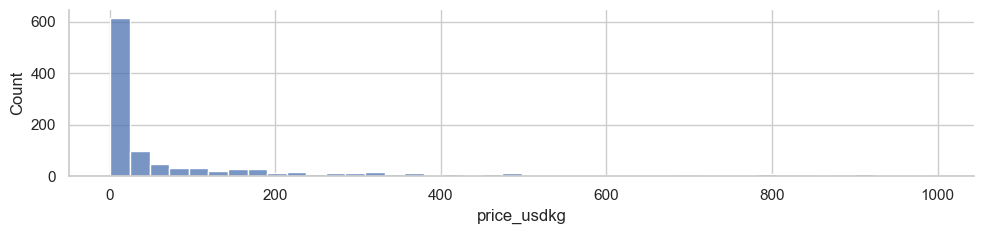

In [180]:
for code in ved[1:2]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] < 1000)], x="price_usdkg", height=2.5, aspect=4)

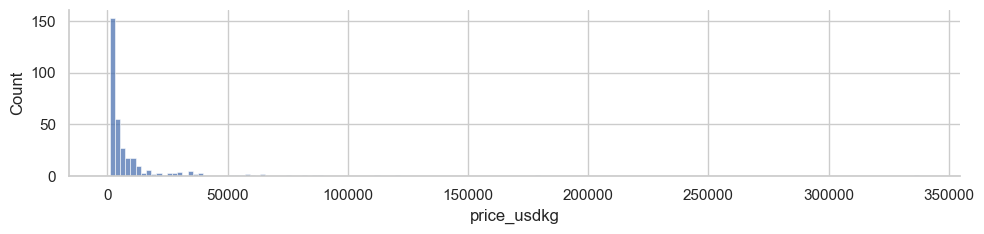

In [181]:
for code in ved[1:2]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] >= 1000)], x="price_usdkg", height=2.5, aspect=4)

### ВЭД  1520000000

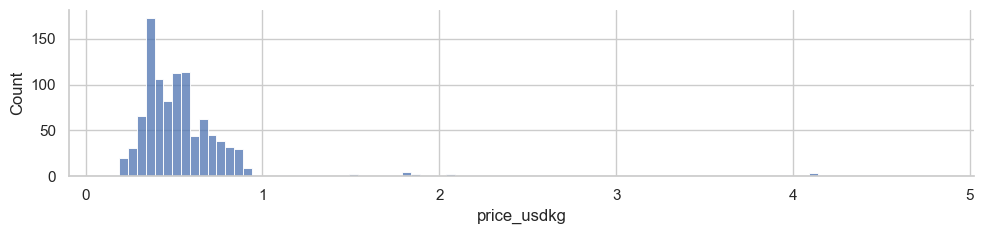

In [197]:
for code in ved[2:3]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] < 5) & (~df['price_usdkg'].isna())], 
                x="price_usdkg", height=2.5, aspect=4)

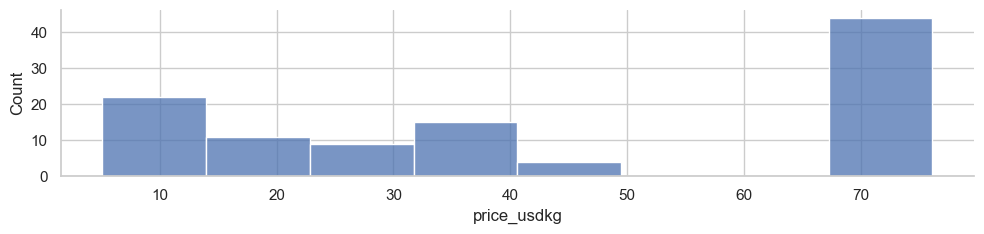

In [199]:
for code in ved[2:3]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] >= 5) & (df['price_usdkg'] < 100) & (~df['price_usdkg'].isna())], 
                x="price_usdkg", height=2.5, aspect=4)

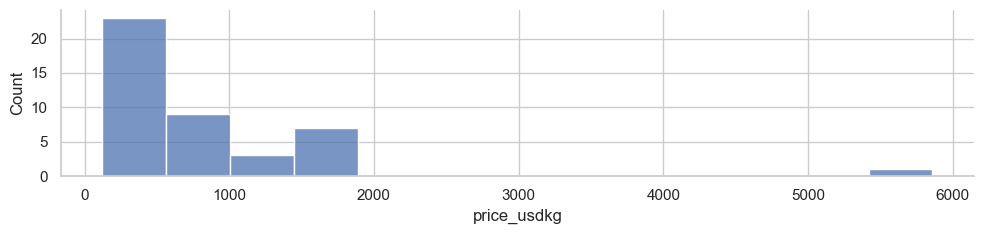

In [196]:
for code in ved[2:3]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] >= 100) & (~df['price_usdkg'].isna())], 
                x="price_usdkg", height=2.5, aspect=4)

### ВЭД  3817008000

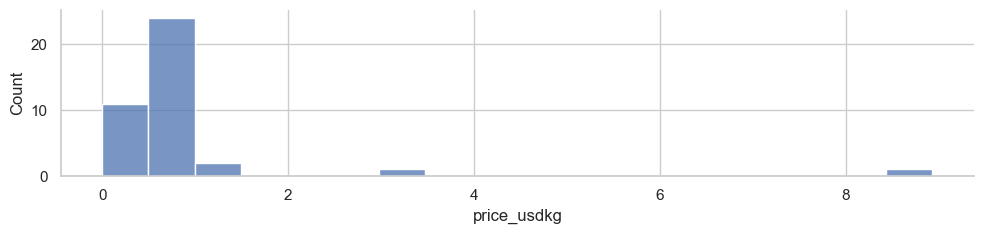

In [183]:
for code in ved[3:4]:
    sns.displot(df[df['ved_g33'] == code], x="price_usdkg", height=2.5, aspect=4)

### ВЭД 2901290000

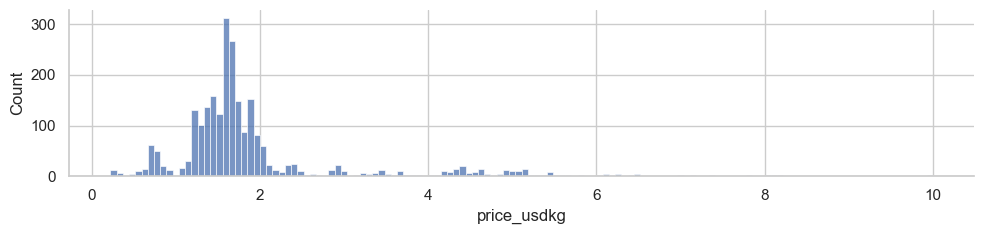

In [203]:
for code in ved[6:7]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] <= 10) & (~df['price_usdkg'].isna())], 
                x="price_usdkg", height=2.5, aspect=4)

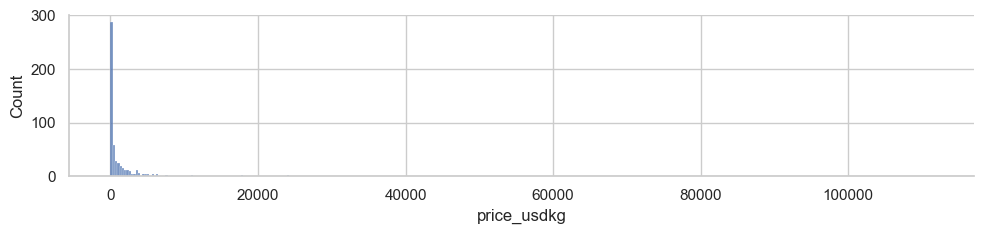

In [204]:
for code in ved[6:7]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] > 10) & (~df['price_usdkg'].isna())], 
                x="price_usdkg", height=2.5, aspect=4)

### ВЭД 2909498009

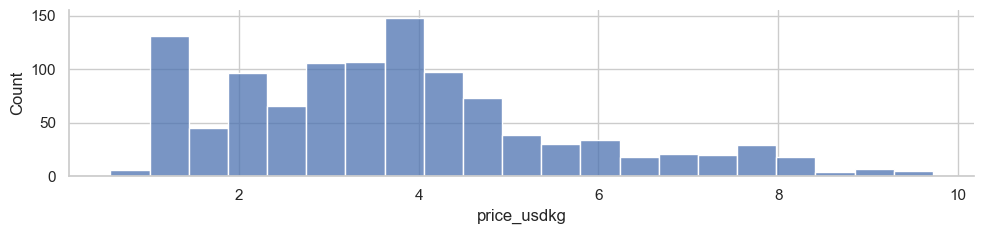

In [208]:
for code in ved[7:8]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] <= 10) & (~df['price_usdkg'].isna())], 
                x="price_usdkg", height=2.5, aspect=4)

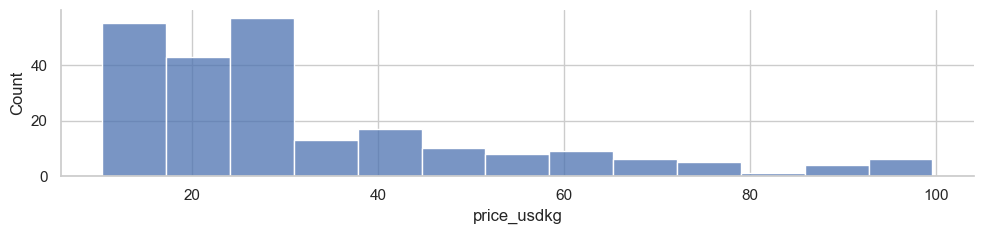

In [215]:
for code in ved[7:8]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] > 10) & (df['price_usdkg'] <= 100) & (~df['price_usdkg'].isna())], 
                x="price_usdkg", height=2.5, aspect=4)

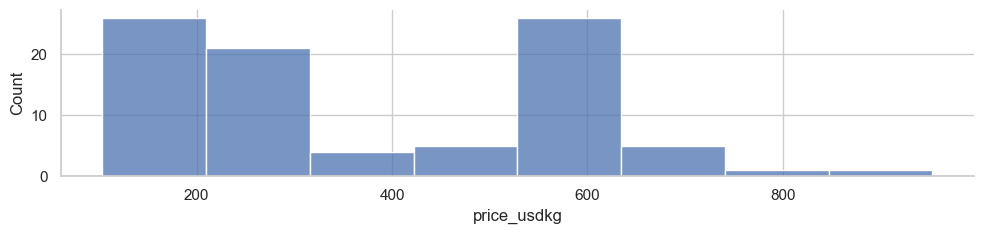

In [216]:
for code in ved[7:8]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] > 100) & (df['price_usdkg'] <= 1000) & (~df['price_usdkg'].isna())], 
                x="price_usdkg", height=2.5, aspect=4)

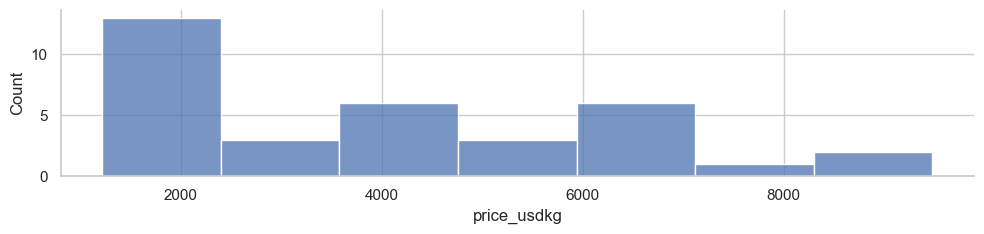

In [218]:
for code in ved[7:8]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] > 1000) & (df['price_usdkg'] <= 10000) & (~df['price_usdkg'].isna())], 
                x="price_usdkg", height=2.5, aspect=4)

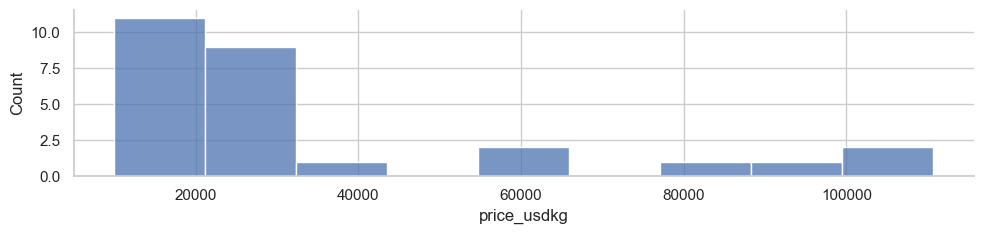

In [217]:
for code in ved[7:8]:
    sns.displot(df[(df['ved_g33'] == code) & (df['price_usdkg'] > 10000) & (~df['price_usdkg'].isna())], 
                x="price_usdkg", height=2.5, aspect=4)

## Price subcategory separation

In [245]:
base = 4

This value "base" means relation between higher and lower limits of price subcategories. It supposed that the lower limit of subcategory can by 2 times less that the middle and the higher limit can be 2 times more. This is the very rough method and gauss-based clasterisation needed later

In [302]:
for code in ved:
    price = df[df['ved_g33'] == code]['price_usdkg'].tolist()
    rel = max(price) / min(price)
    
    if rel == 1: groups = 1 
    else: groups = m.ceil(m.log(rel, base))
        
    for g in range(groups):
        subtype = code + '_' + str(g + 1)
            
        indices = df[
            (df['ved_g33'] == code) \
            & (df['price_usdkg'] >= min(price) * base ** g) \
            & (df['price_usdkg'] < min(price) * base ** (g + 1))
            ].index
        df.loc[indices, 'subtype'] = subtype    

In [309]:
sum(df['subtype'].value_counts() > 1)

277

## Weights

In [84]:
df[(df['netto_g38'] == 0) & (df['brutto_g35'] != '0')].loc[:, ['netto_g38', 'brutto_g35']]

,netto_g38,brutto_g35
666,0.0,0.23
2687,0.0,2
2701,0.0,0.07
3075,0.0,0.1
4092,0.0,3.35
...,...,...
33915,0.0,0.05
34328,0.0,0.01
34440,0.0,0.01
34685,0.0,0.03


In [127]:
df.loc[df['index'] == '3992']

,index,gtd_nd,date_out_gd1,direction_g011,sender_inn_g021,sender_name_g022,receiver_inn_g081,receiver_name_g082,send_country_g15,destination_country_g17b,...,product_country_g3113,cargo_units_quantity_g312,conteiners_quantity_g313,ved_g33,brutto_g35,netto_g38,currency_cost_g42,customs_cost_usd_g46,price_usdkg,price_currency
4091,3992,10005030/300522/3159467,2022-05-30,ИМ,NaN,DELFARM DIJON.,9909245460,ПРЕДСТАВИТЕЛЬСТВО АО САНОФИ-АВЕНТИС ГРУП (ФРАН...,ФРАНЦИЯ,РОССИЯ,...,ФРАНЦИЯ,1,0,2930909508,10,0.01,0.0,3377.3,337730.0,0.0
